In [18]:
%pylab inline

import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Programming Collective Intelligence, Chapter 8, O'Reilly

In [34]:
from random import random, randint

In [5]:
def wineprice(rating,age):
  peak_age=rating-50
  
  # Calculate price based on rating
  price=rating/2

  if age>peak_age:
    # Past its peak, goes bad in 10 years
    price=price*(5-(age-peak_age)/2)
  else:
    # Increases to 5x original value as it
    # approaches its peak
    price=price*(5*((age+1)/peak_age))
  
  if price<0: price=0
  return price

In [1]:
def wineset1():
  rows=[]
  for i in range(300):
    # Create a random age and rating
    rating=random()*50+50
    age=random()*50

    # Get reference price
    price=wineprice(rating,age)
    
    # Add some noise
    price*=(random()*0.2+0.9)

    # Add to the dataset
    rows.append({'input':(rating,age),
                 'result':price})
  return rows

## Feature Analysis

In [35]:
wine_dict = lambda wine: {'rating': wine['input'][0],
                          'age': wine['input'][1],
                          'price': wine['result']}

wine_is_good = wines.price > 0
wine_is_bad = wines.price == 0

wines = pd.DataFrame([wine_dict(wine) for wine in wineset1()])

### Feature Value Distributions

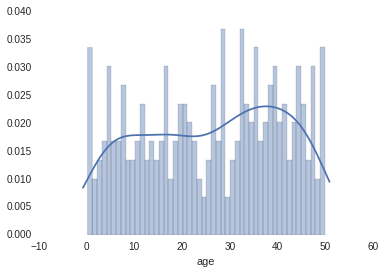

In [22]:
sns.distplot(wines.age, bins=50)

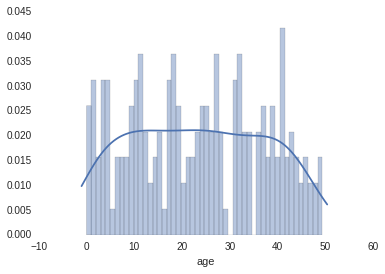

In [36]:
sns.distplot(wines[wine_is_good].age, bins=50)

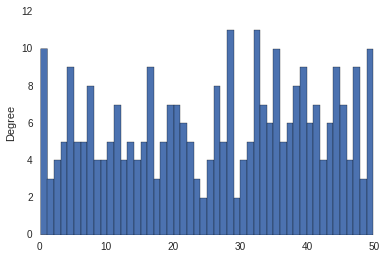

In [26]:
wines.age.plot(kind='hist', bins=50)

### Correlation

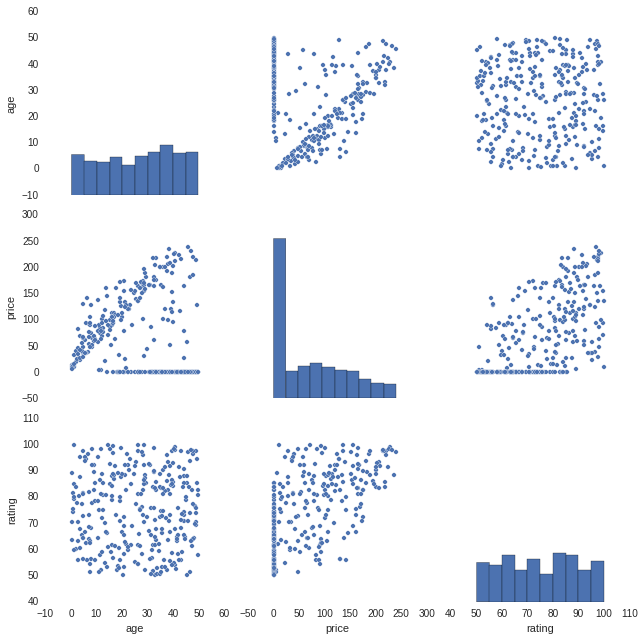

In [32]:
sns.pairplot(wines)

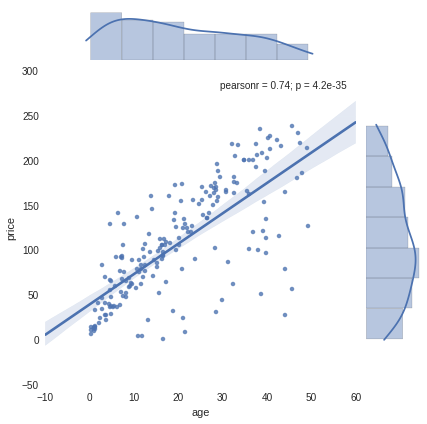

In [31]:
sns.jointplot(x=wines[wine_is_good].age, y=wines[wine_is_good].price)